Especialização em Inteligência Artificial<br>
Lista de Exercícios 03 de Análise e Previsão de Séries Temporais<br>
Prof. Carlos Severiano<br>
Aluno: Fernando dos Santos Alves Fernandes

Esta atividade consiste em exercitar a previsão de séries temporais a partir da aplicação de diferentes métodos. Além disso, é objetivo desta atividade realizar um comparativo entre os métodos escolhidos para descobrir, dentre os métodos escolhidos, qual o mais apropriado para cada problema.

Serão realizados 4 comparativos utilizando as bases de dados anexadas a esta atividade (*Electric_Production.csv*, *shampoo_sales.csv*, *airline-passengers.csv* e *facebook-historical-stock-price.csv*).

Para cada base de dados, os seguintes passos devem ser realizados:

1. Escolher 3 modelos, cada um pertencente a um dos grupos abaixo:
    <br>a.	Um modelo simples
    <br>b.	Um modelo de suavização exponencial
    <br>c.	Um modelo ARIMA

2. Separar a base de dados em treinamento e teste, na proporção 80% para 20%.

3. Aplicar cada método de previsão aos dados, usando validação cruzada.

4. Medir o desempenho de cada modelo a partir de 3 métricas: MAE, RMSE e MAPE.

5. Ilustrar em um gráfico o desempenho do método que se saiu melhor nos experimentos de cada base de dados.

In [274]:
# Importando das bibliotecas utilizadas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from datetime import datetime
import locale
from random import gauss, randrange, random

import statsmodels.tsa.api as smt
import statsmodels.api as sm
import statsmodels.regression.linear_model as rlm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

from pandas.plotting import autocorrelation_plot

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error

from math import sqrt

rcParams['figure.figsize'] = 15, 6
locale.setlocale(locale.LC_ALL, '')
formato = "%m/%d/%Y"

### Base 1

In [275]:
# Carregando os dados da série temporal. Base: 'Electric_Production.csv'.

electric_production = pd.read_csv('datasets/Electric_Production.csv', index_col='DATE')

In [276]:
electric_production.describe()

,IPG2211A2N
count,397.000000
mean,88.847218
std,15.387834
min,55.315100
25%,77.105200
50%,89.779500
75%,100.524400
max,129.404800


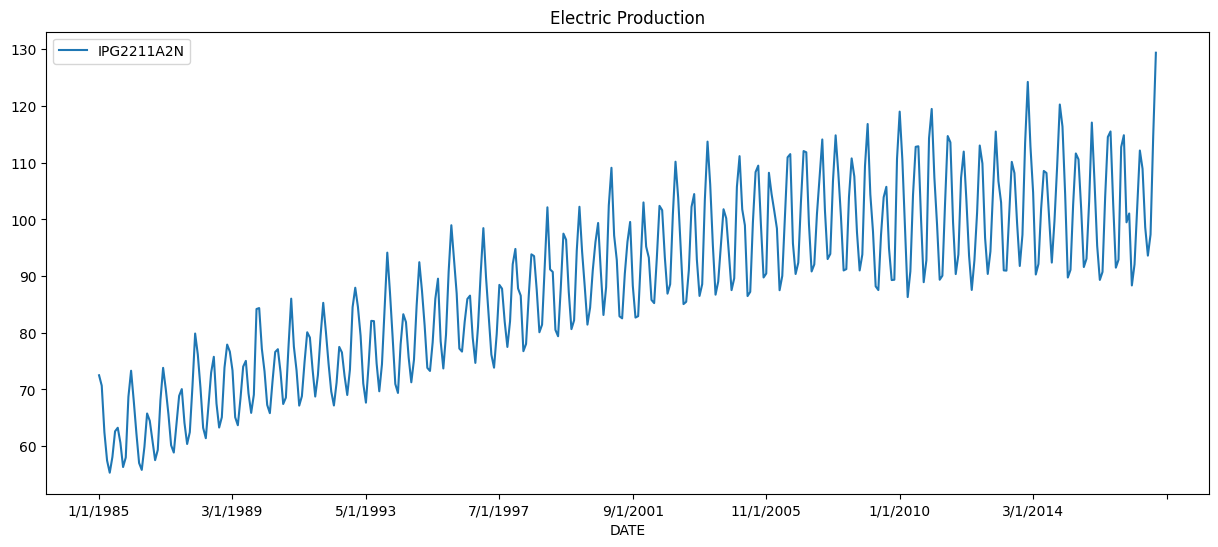

In [277]:
electric_production.plot(title='Electric Production', legend='Production')
plt.legend(loc='best')
plt.show()

In [278]:
electric_production.head()

,IPG2211A2N
DATE,
1/1/1985,72.5052
2/1/1985,70.6720
3/1/1985,62.4502
4/1/1985,57.4714
5/1/1985,55.3151


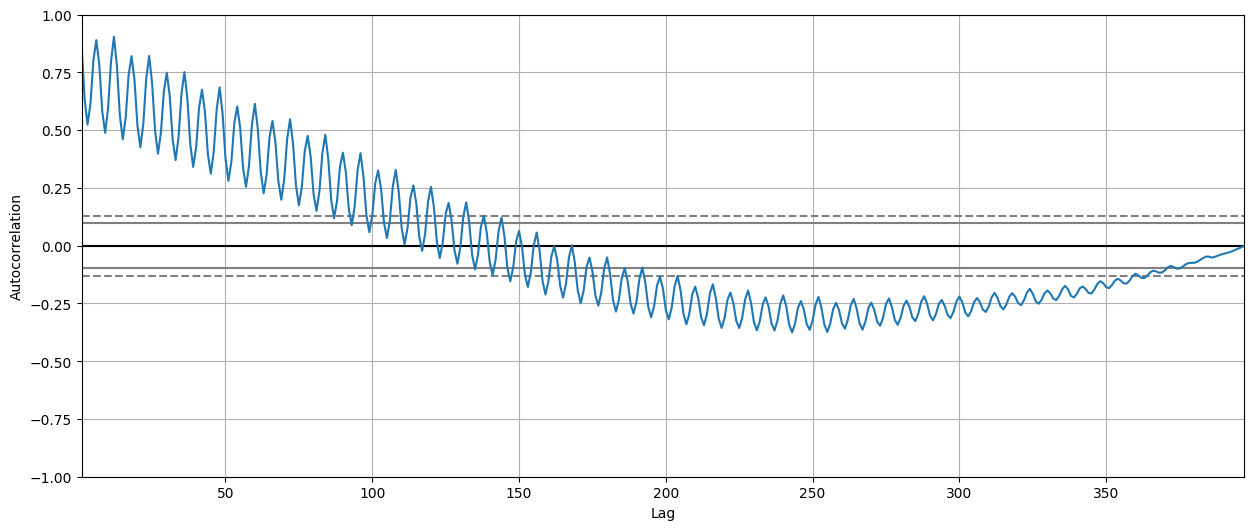

In [279]:
autocorrelation_plot(electric_production)
plt.show()

In [280]:
# 1. Escolhendo um modelo simples: Método da média dos dados históricos.

# 2. Separando a base de dados em treinamento e teste, na proporção de 80% para 20%.

X = electric_production.values
size = int(len(X) * 0.80)
train, test = X[0:size], X[size:len(X)]

history = [np.double(x) for x in train]
predictions = []

# print(f'{train.size} {test.size}')

# 3. Aplicando a previsão aos dados, usando validação cruzada.

i = 0

# print(f'{history}')

for t in range(len(test)):
	yhat = np.mean(history)
	# print(f'yhat = {yhat}')
	predictions.append(yhat)
	obs = test[t]
	history.append(np.double(yhat))
	history = history[-(size):]
	# print(f'{history[-(size):]}')
	print('previsão=%f, osbervado=%f' % (yhat, obs))

previsão=85.346568, osbervado=102.820400
previsão=85.387077, osbervado=114.706800
previsão=85.433497, osbervado=113.595800
previsão=85.506000, osbervado=99.471200
previsão=85.594437, osbervado=90.356600
previsão=85.689955, osbervado=93.809500
previsão=85.777020, osbervado=107.331200
previsão=85.850070, osbervado=111.964600
previsão=85.921368, osbervado=103.367900
previsão=86.001295, osbervado=93.577200
previsão=86.094941, osbervado=87.556600
previsão=86.183567, osbervado=92.760300
previsão=86.238675, osbervado=101.140000
previsão=86.279473, osbervado=113.035700
previsão=86.337178, osbervado=109.860100
previsão=86.413251, osbervado=96.743100
previsão=86.505933, osbervado=90.380500
previsão=86.602754, osbervado=94.341700
previsão=86.686989, osbervado=105.272200
previsão=86.752987, osbervado=115.501000
previsão=86.823244, osbervado=106.734000
previsão=86.904703, osbervado=102.994800
previsão=86.997361, osbervado=91.009200
previsão=87.084603, osbervado=90.963400
previsão=87.144380, osberva

Test MAE: 3.840
Test RMSE: 17.557
Test MAPE: 0.369


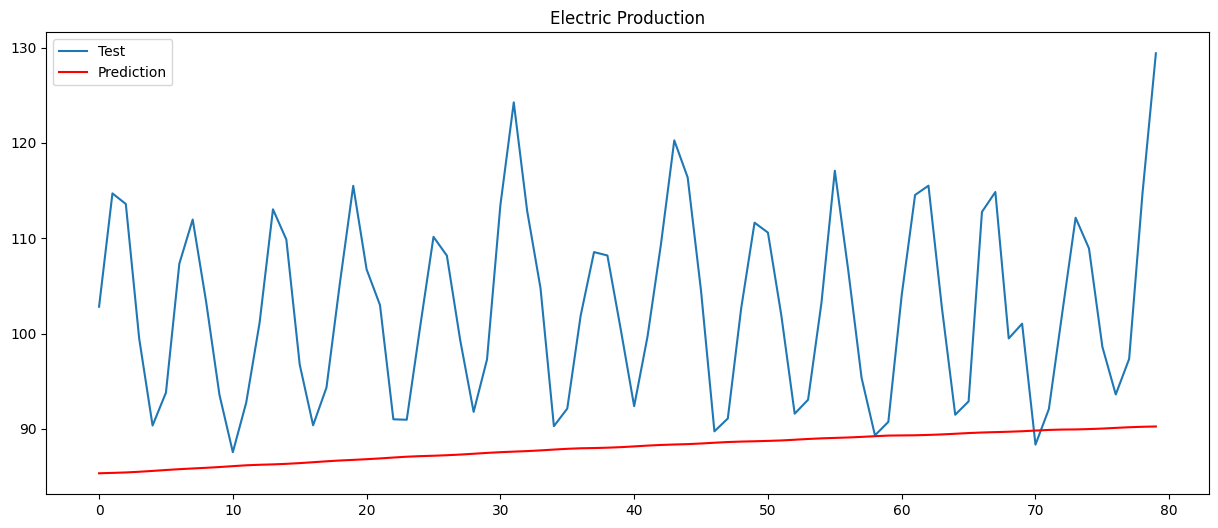

In [281]:
# 4. Medindo o desempenho do modelo a partir das métricas: MAE, RMSE e MAPE
mae = sqrt(mean_absolute_error(test, predictions))
print('Test MAE: %.3f' % mae)

rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

mape = sqrt(mean_absolute_percentage_error(test, predictions))
print('Test MAPE: %.3f' % mape)

plt.title("Electric Production")
plt.plot(test, label='Test')
plt.plot(predictions, color='red', label='Prediction')
plt.legend(loc='best')
plt.show()

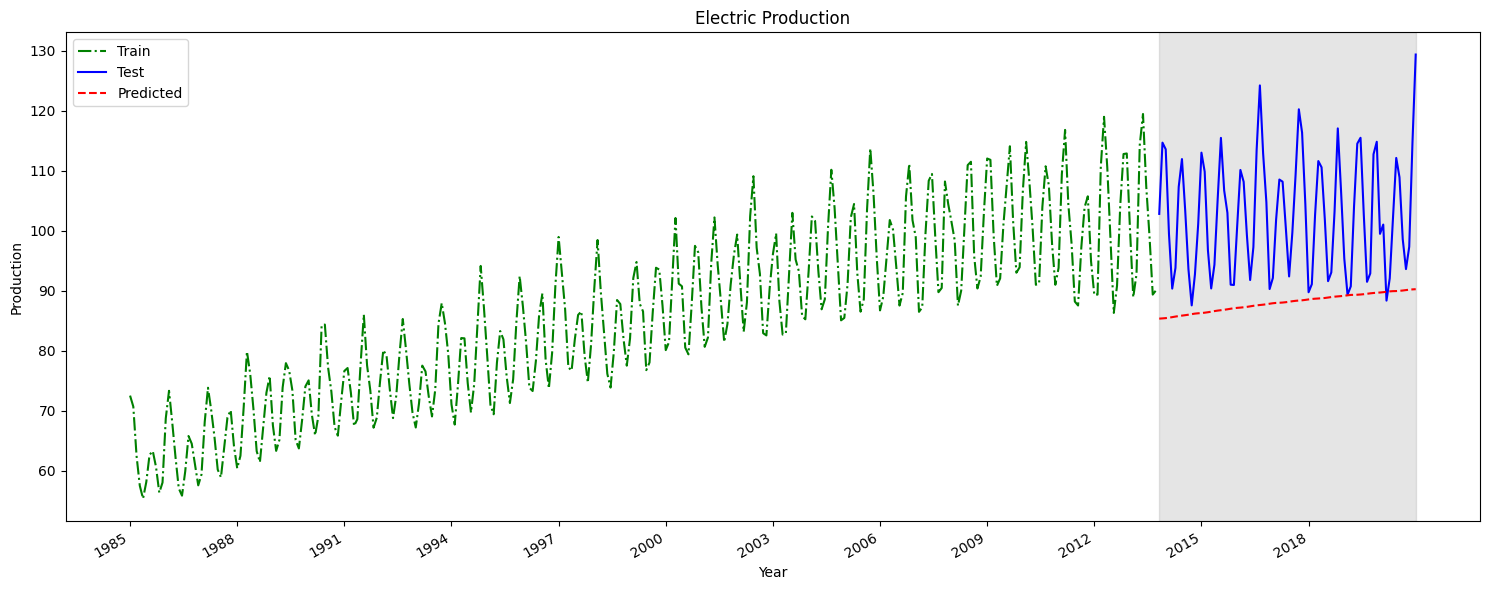

In [282]:
# 5 Ilustrando graficamente o desempenho do modelo simples.

fig, ax = plt.subplots()

ax.plot(electric_production.index[0:size], train, 'g-.', label='Train')
ax.plot(electric_production.index[size:len(X)], test, 'b-', label='Test')
ax.plot(electric_production.index[size:len(X)], predictions, 'r--', label='Predicted')
ax.set_xlabel('Year')
ax.set_ylabel('Production')
ax.axvspan(317, 396, color='#808080', alpha=0.2) # zona cinza
ax.legend(loc='best')
plt.title("Electric Production")
# 1985 a 2018
plt.xticks(np.arange(0, 396, 33), [1985, 1988, 1991, 1994, 1997, 2000, 2003, 2006, 2009, 2012, 2015, 2018])
# plt.xticks(np.arange(0, 36, 2), [1901, 'mar', 'mai', 'jul', 'sep', 'nov', 1902, 'mar', 'mai', 'jul', 'sep', 'nov', 1903, 'mar', 'mai', 'jul', 'sep', 'nov'])

fig.autofmt_xdate()
plt.tight_layout()

### Base 2

In [283]:
# Carregando os dados da série temporal. Base: 'shampoo_sales.csv'.

shampoo_sales = pd.read_csv('datasets/shampoo_sales.csv', index_col='Month')
#shampoo_sales.index = shampoo_sales.index.to_period('M')

In [284]:
shampoo_sales.describe()

,Sales
count,36.000000
mean,312.600000
std,148.937164
min,119.300000
25%,192.450000
50%,280.150000
75%,411.100000
max,682.000000


In [285]:
shampoo_sales.size

36

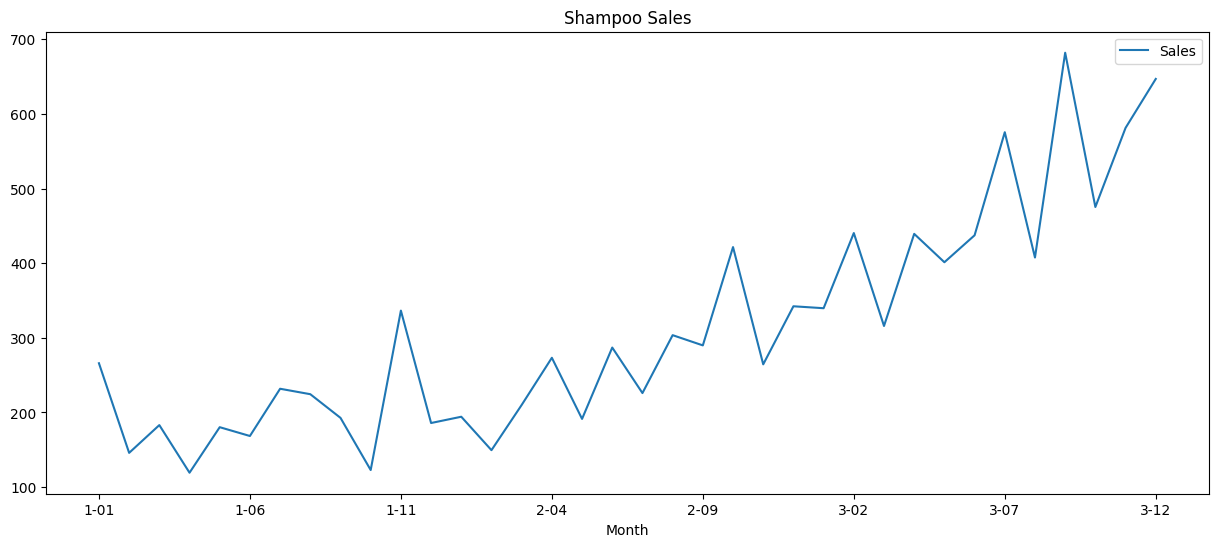

In [286]:
shampoo_sales.plot(title='Shampoo Sales', legend='Sales')
plt.legend(loc='best')
plt.show()

In [287]:
shampoo_sales.head()

,Sales
Month,
1-01,266.0
1-02,145.9
1-03,183.1
1-04,119.3
1-05,180.3


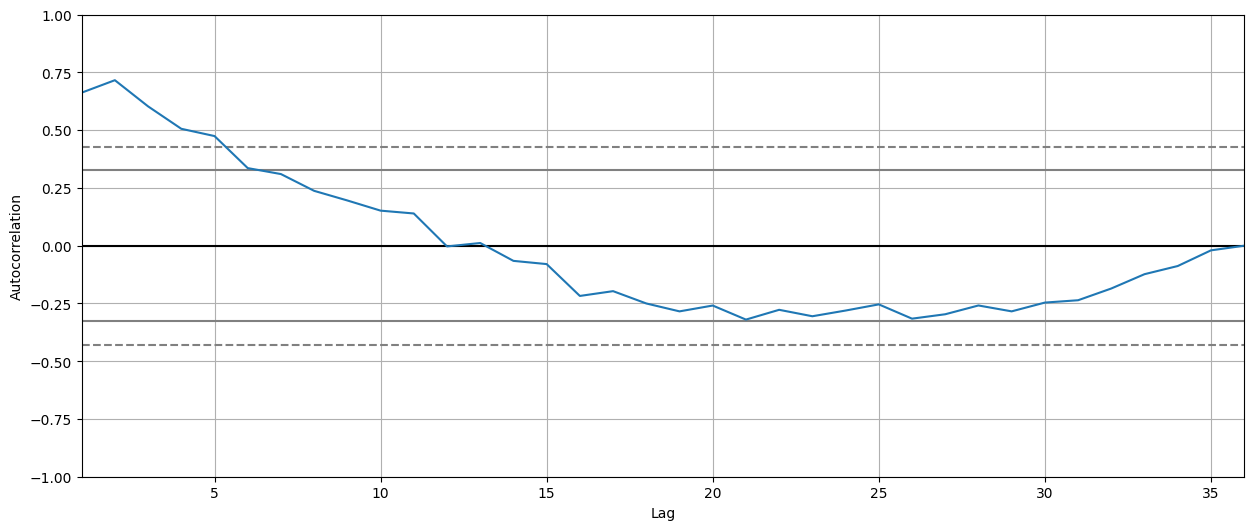

In [288]:
autocorrelation_plot(shampoo_sales)
plt.show()

In [289]:
# 1. Escolhendo um modelo simples: Método da média dos dados históricos.

# 2. Separando a base de dados em treinamento e teste, na proporção de 80% para 20%.

X = shampoo_sales.values
size = int(len(X) * 0.80)
train, test = X[0:size], X[size:len(X)]

history = [np.double(x) for x in train]
predictions = []

# print(f'{train.size} {test.size}')

# 3. Aplicando a previsão aos dados, usando validação cruzada.

i = 0

# print(f'{history}')

for t in range(len(test)):
	yhat = np.mean(history)
	# print(f'yhat = {yhat}')
	predictions.append(yhat)
	obs = test[t]
	history.append(np.double(yhat))
	history = history[-(size):]
	# print(f'{history[-(size):]}')
	print('previsão=%f, osbervado=%f' % (yhat, obs))

previsão=251.653571, osbervado=401.300000
previsão=251.141199, osbervado=437.400000
previsão=254.899813, osbervado=575.500000
previsão=257.464092, osbervado=407.600000
previsão=262.398524, osbervado=682.000000
previsão=265.330614, osbervado=475.300000
previsão=268.788851, osbervado=581.300000
previsão=270.109881, osbervado=646.900000


Test MAE: 16.300
Test RMSE: 283.328
Test MAPE: 0.698


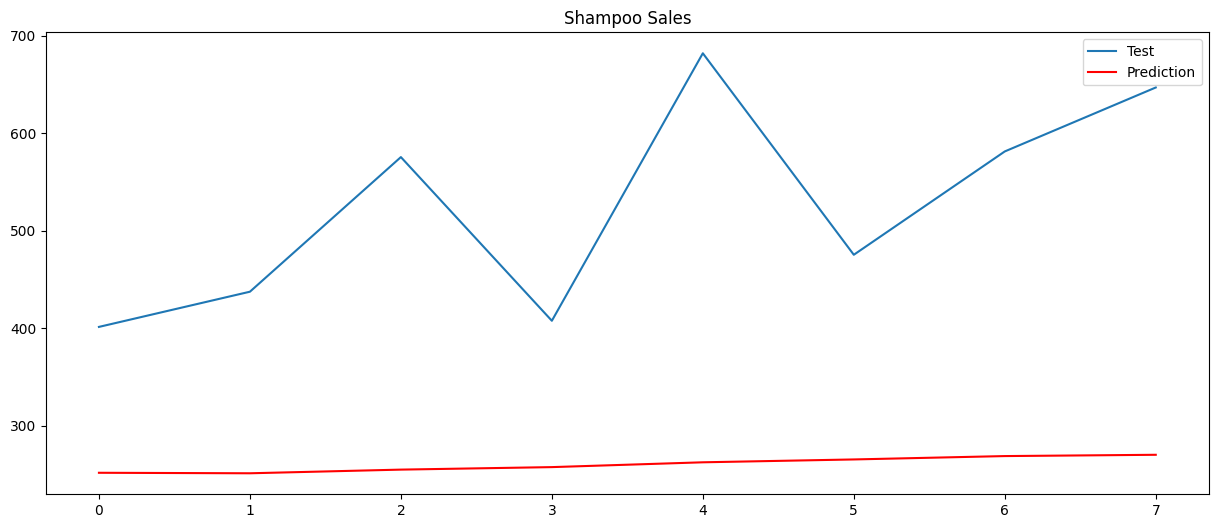

In [290]:
# 4. Medindo o desempenho do modelo a partir das métricas: MAE, RMSE e MAPE
mae = sqrt(mean_absolute_error(test, predictions))
print('Test MAE: %.3f' % mae)

rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

mape = sqrt(mean_absolute_percentage_error(test, predictions))
print('Test MAPE: %.3f' % mape)

plt.title("Shampoo Sales")
plt.plot(test, label='Test')
plt.plot(predictions, color='red', label='Prediction')
plt.legend(loc='best')
plt.show()

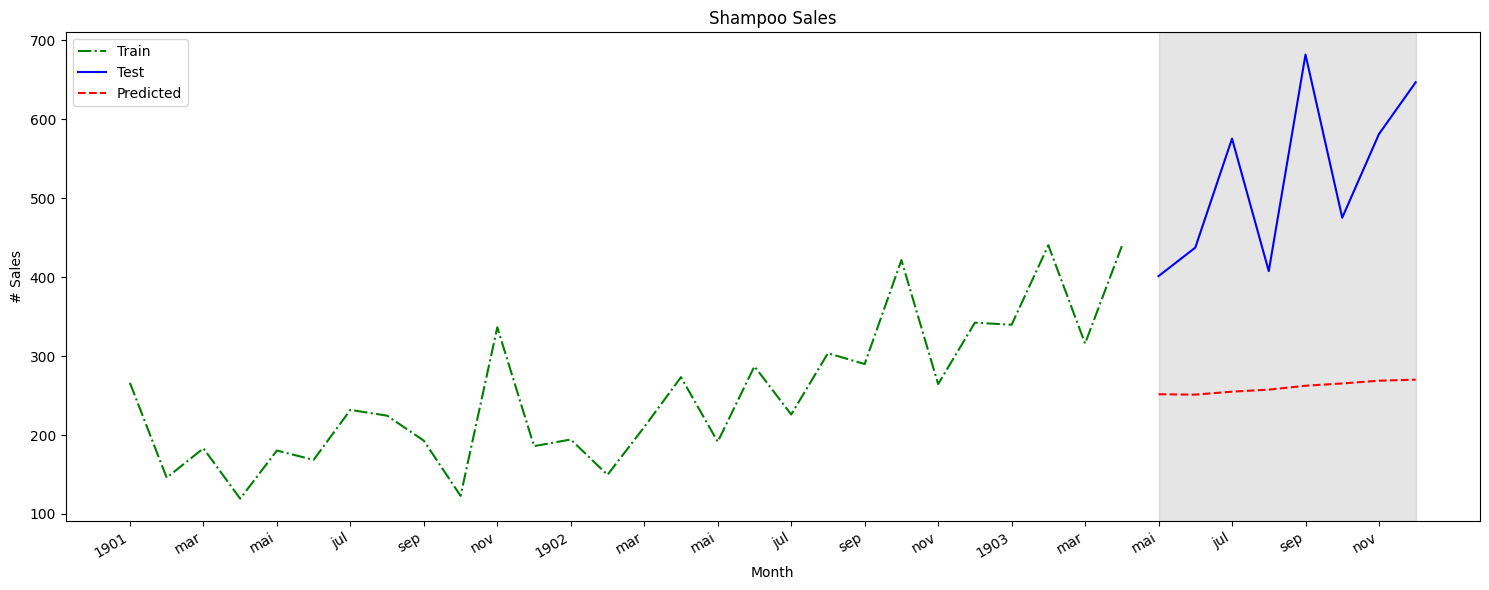

In [291]:
# 5 Ilustrando graficamente o desempenho do modelo simples.

fig, ax = plt.subplots()

ax.plot(shampoo_sales.index[0:size], train, 'g-.', label='Train')
ax.plot(shampoo_sales.index[size:len(X)], test, 'b-', label='Test')
ax.plot(shampoo_sales.index[size:len(X)], predictions, 'r--', label='Predicted')
ax.set_xlabel('Month')
ax.set_ylabel('# Sales')
ax.axvspan(28, 35, color='#808080', alpha=0.2) # zona cinza
ax.legend(loc='best')
plt.title("Shampoo Sales")
plt.xticks(np.arange(0, 36, 2), [1901, 'mar', 'mai', 'jul', 'sep', 'nov', 1902, 'mar', 'mai', 'jul', 'sep', 'nov', 1903, 'mar', 'mai', 'jul', 'sep', 'nov'])

fig.autofmt_xdate()
plt.tight_layout()

In [292]:
# 1. b) Escolhendo um modelo de suavização exponencial: Suavização Exponencial Simples.

model = SimpleExpSmoothing(shampoo_sales)
model_fit = model.fit()

print(model_fit.summary())

# 2. Separando a base de dados em treinamento e teste, na proporção de 80% para 20%.

X = shampoo_sales.values
size = int(len(X) * 0.80)
train, test = X[0:size], X[size:len(X)]
# print(yhat)

                       SimpleExpSmoothing Model Results                       
Dep. Variable:                  Sales   No. Observations:                   36
Model:             SimpleExpSmoothing   SSE                         247635.134
Optimized:                       True   AIC                            322.103
Trend:                           None   BIC                            325.270
Seasonal:                        None   AICC                           323.393
Seasonal Periods:                None   Date:                 seg, 06 nov 2023
Box-Cox:                        False   Time:                         13:17:38
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.4168588                alpha                 True
initial_level              266.00000                

c:\Users\tecnoind.HP-67003B2E\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [293]:
# 3. Aplicando a previsão aos dados, usando validação cruzada.

history = [x for x in train]
predictions = []

# yhat = model_fit.predict(size, len(X))
# yhat = model_fit.predict(size, size)
# print(f'{size}, {len(X)}, {yhat.size}')
# print(f'{yhat[0]}')

init = size

for t in range(len(test)):
	model = SimpleExpSmoothing(shampoo_sales)
	model_fit = model.fit()
	yhat = model_fit.predict(init, init)
	predictions.append(yhat[0])
	obs = test[t]
	history.append(obs)
	init = init + 1
	print('previsão=%f, osbervado=%f' % (yhat, obs))

previsão=387.577862, osbervado=401.300000
previsão=393.298056, osbervado=437.400000
previsão=411.682341, osbervado=575.500000
previsão=479.971180, osbervado=407.600000
previsão=449.802614, osbervado=682.000000
previsão=546.596146, osbervado=475.300000
previsão=516.875718, osbervado=581.300000
previsão=543.731549, osbervado=646.900000


c:\Users\tecnoind.HP-67003B2E\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\tecnoind.HP-67003B2E\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\tecnoind.HP-67003B2E\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\tecnoind.HP-67003B2E\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\U

Test MAE: 9.779
Test RMSE: 116.190
Test MAPE: 0.412


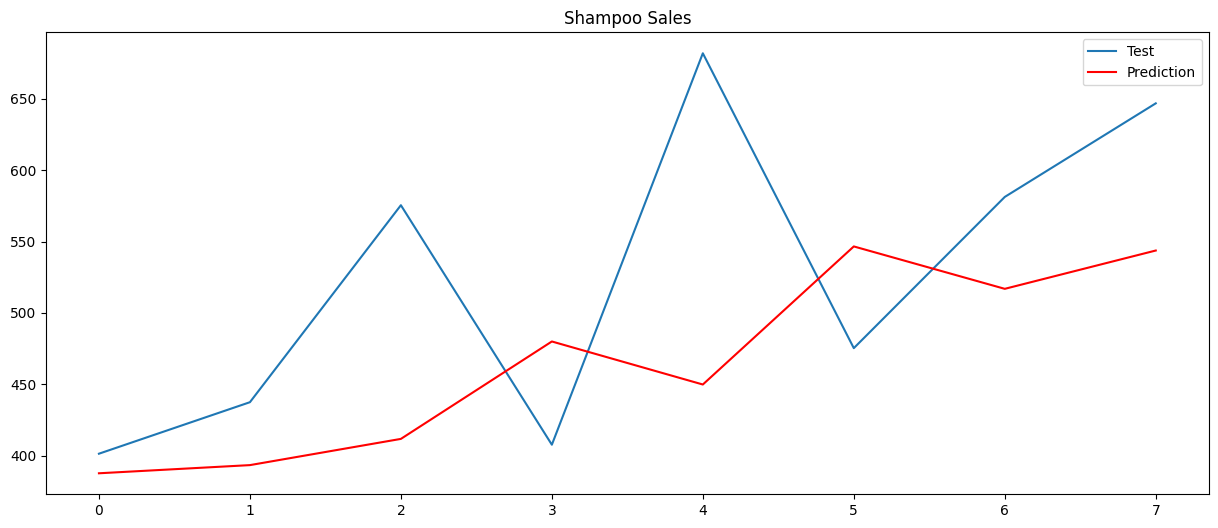

In [294]:
# 4. Medindo o desempenho do modelo a partir das métricas: MAE, RMSE e MAPE
mae = sqrt(mean_absolute_error(test, predictions))
print('Test MAE: %.3f' % mae)

rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

mape = sqrt(mean_absolute_percentage_error(test, predictions))
print('Test MAPE: %.3f' % mape)

plt.title("Shampoo Sales")
plt.plot(test, label='Test')
plt.plot(predictions, color='red', label='Prediction')
plt.legend(loc='best')
plt.show()

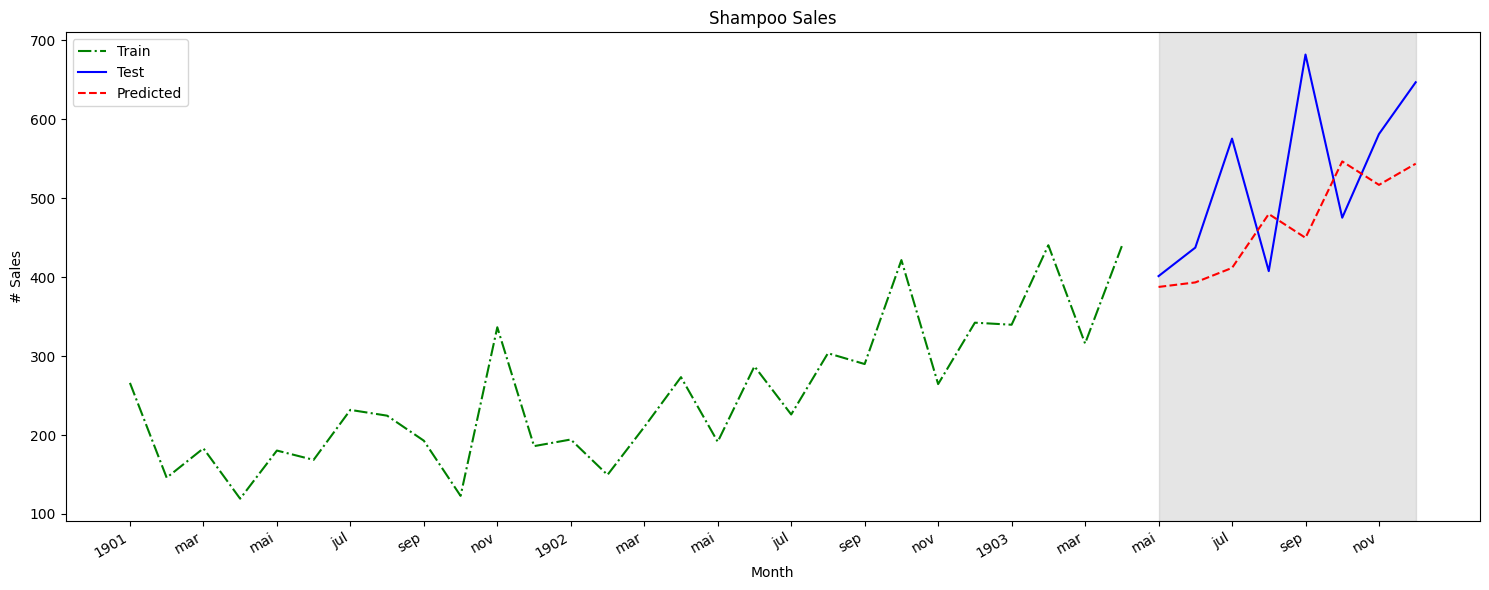

In [295]:
# 5 Ilustrando graficamente o desempenho do modelo de suavização exponencial simples.

fig, ax = plt.subplots()

ax.plot(shampoo_sales.index[0:size], train, 'g-.', label='Train')
ax.plot(shampoo_sales.index[size:len(X)], test, 'b-', label='Test')
ax.plot(shampoo_sales.index[size:len(X)], predictions, 'r--', label='Predicted')
ax.set_xlabel('Month')
ax.set_ylabel('# Sales')
ax.axvspan(28, 35, color='#808080', alpha=0.2) # zona cinza
ax.legend(loc='best')
plt.title("Shampoo Sales")
plt.xticks(np.arange(0, 36, 2), [1901, 'mar', 'mai', 'jul', 'sep', 'nov', 1902, 'mar', 'mai', 'jul', 'sep', 'nov', 1903, 'mar', 'mai', 'jul', 'sep', 'nov'])

fig.autofmt_xdate()
plt.tight_layout()

In [296]:
# 1. c) Escolhendo um modelo ARIMA.

model = ARIMA(shampoo_sales, order=(5,1,0))
model_fit = model.fit()
print(model_fit.summary())

# 2. Separando a base de dados em treinamento e teste, na proporção de 80% para 20%.

X = shampoo_sales.values
size = int(len(X) * 0.80)
train, test = X[0:size], X[size:len(X)]

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -198.485
Date:                seg, 06 nov 2023   AIC                            408.969
Time:                        13:17:40   BIC                            418.301
Sample:                             0   HQIC                           412.191
                                 - 36                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9014      0.247     -3.647      0.000      -1.386      -0.417
ar.L2         -0.2284      0.268     -0.851      0.395      -0.754       0.298
ar.L3          0.0747      0.291      0.256      0.7

c:\Users\tecnoind.HP-67003B2E\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\tecnoind.HP-67003B2E\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\tecnoind.HP-67003B2E\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [297]:
# 3. Aplicando a previsão aos dados, usando validação cruzada.

history = [x for x in train]
predictions = []

for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('previsão=%f, osbervado=%f' % (yhat, obs))

previsão=357.645323, osbervado=401.300000
previsão=443.047835, osbervado=437.400000
previsão=378.365674, osbervado=575.500000
previsão=459.415021, osbervado=407.600000
previsão=526.890876, osbervado=682.000000
previsão=457.231274, osbervado=475.300000
previsão=672.914943, osbervado=581.300000
previsão=531.541449, osbervado=646.900000


Test MAE: 9.209
Test RMSE: 105.813
Test MAPE: 0.386


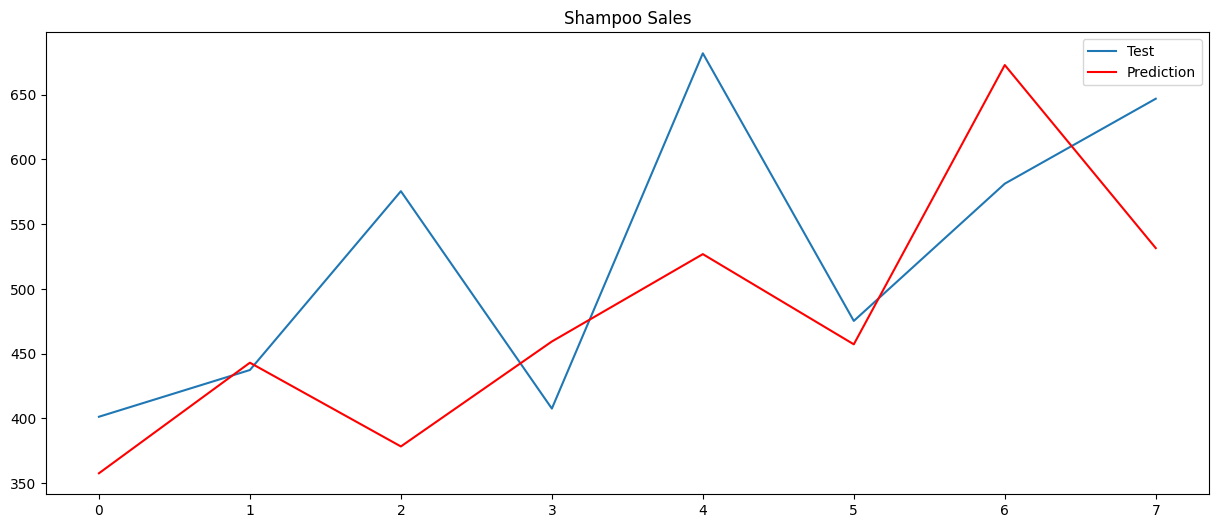

In [298]:
# 4. Medindo o desempenho do modelo a partir das métricas: MAE, RMSE e MAPE
mae = sqrt(mean_absolute_error(test, predictions))
print('Test MAE: %.3f' % mae)

rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

mape = sqrt(mean_absolute_percentage_error(test, predictions))
print('Test MAPE: %.3f' % mape)

plt.title("Shampoo Sales")
plt.plot(test, label='Test')
plt.plot(predictions, color='red', label='Prediction')
plt.legend(loc='best')
plt.show()

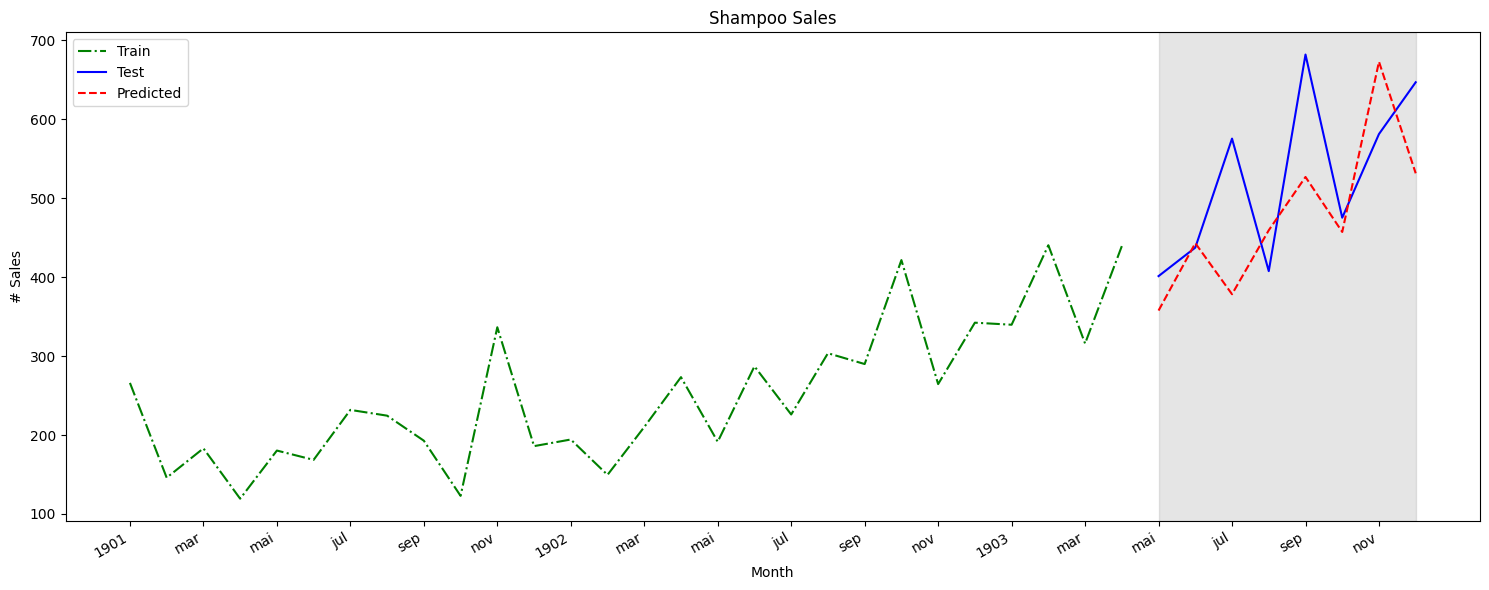

In [299]:
# 5 Ilustrando graficamente o desempenho do modelo ARIMA.

fig, ax = plt.subplots()

ax.plot(shampoo_sales.index[0:size], train, 'g-.', label='Train')
ax.plot(shampoo_sales.index[size:len(X)], test, 'b-', label='Test')
ax.plot(shampoo_sales.index[size:len(X)], predictions, 'r--', label='Predicted')
ax.set_xlabel('Month')
ax.set_ylabel('# Sales')
ax.axvspan(28, 35, color='#808080', alpha=0.2) # zona cinza
ax.legend(loc='best')
plt.title("Shampoo Sales")
plt.xticks(np.arange(0, 36, 2), [1901, 'mar', 'mai', 'jul', 'sep', 'nov', 1902, 'mar', 'mai', 'jul', 'sep', 'nov', 1903, 'mar', 'mai', 'jul', 'sep', 'nov'])

fig.autofmt_xdate()
plt.tight_layout()

### Base 3

In [300]:
airline_passengers = pd.read_csv('datasets/airline-passengers.csv', parse_dates=True, index_col='Month')

In [301]:
airline_passengers.describe()

,Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


[]

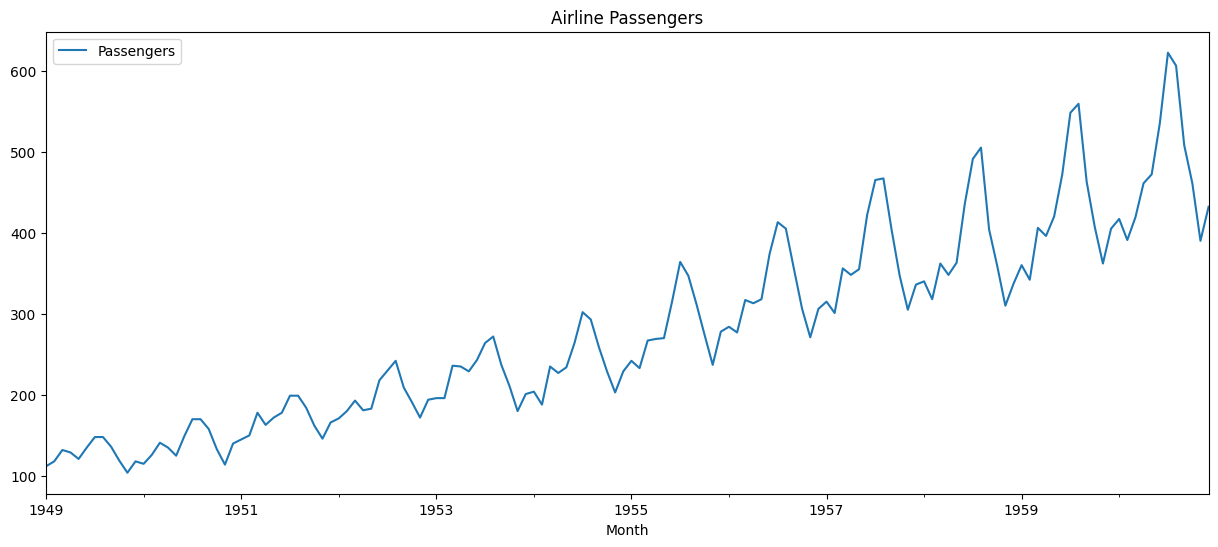

In [302]:
airline_passengers.plot(title='Airline Passengers')
plt.legend(loc='best')
plt.plot()

In [303]:
airline_passengers.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


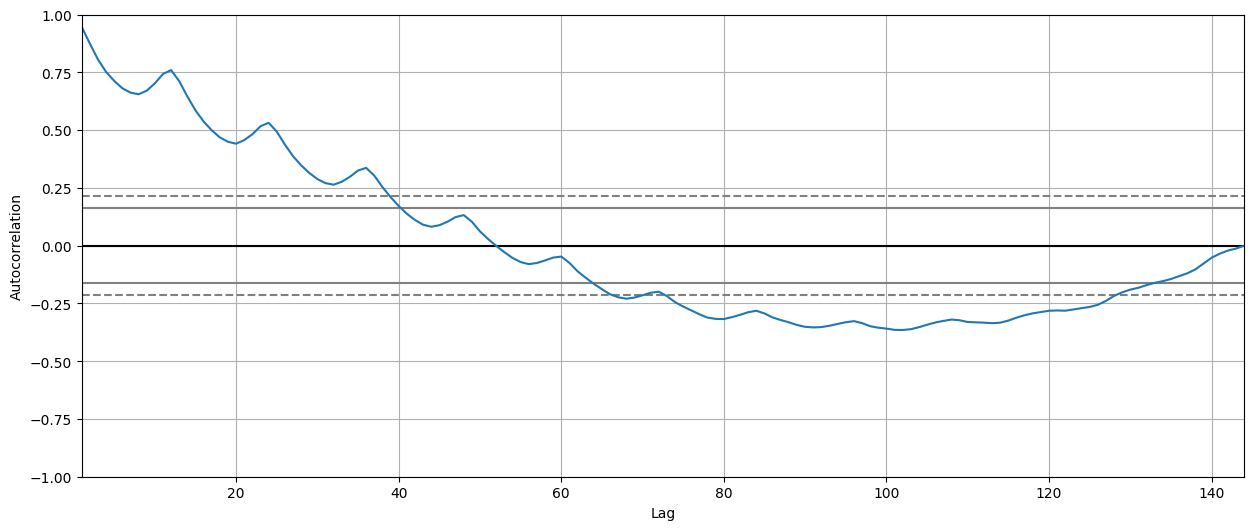

In [304]:
autocorrelation_plot(airline_passengers)
plt.show()

### Base 4

In [305]:
facebook_price = pd.read_csv('datasets/facebook-historical-stock-price.csv', parse_dates=True, index_col='Date')

In [306]:
facebook_price.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2177.000000,2177.000000,2177.000000,2177.000000,2177.000000,2.177000e+03
mean,124.574938,126.023271,123.076050,124.606725,124.606725,3.209257e+07
std,68.433515,69.242731,67.619477,68.474961,68.474961,2.855388e+07
min,18.080000,18.270000,17.549999,17.730000,17.730000,5.913100e+06
25%,71.080002,71.970001,69.959999,71.290001,71.290001,1.618790e+07
50%,121.389999,122.199997,120.070000,121.220001,121.220001,2.328280e+07
75%,177.949997,179.190002,176.149994,177.639999,177.639999,3.770880e+07
max,300.160004,304.670013,293.049988,303.910004,303.910004,5.735764e+08


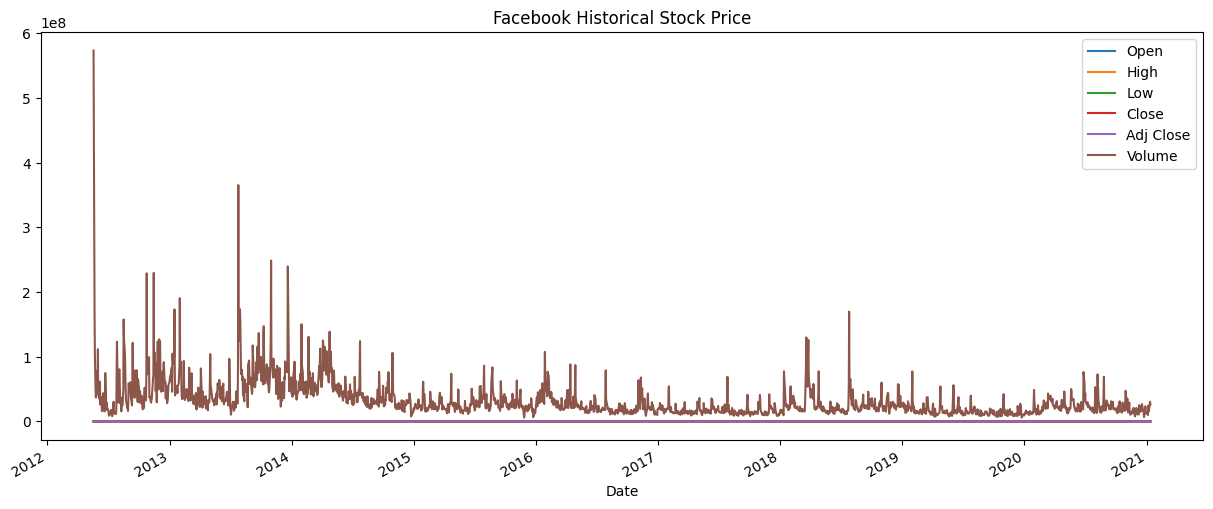

In [307]:
facebook_price.plot(title='Facebook Historical Stock Price')
plt.legend(loc='best')
plt.show()

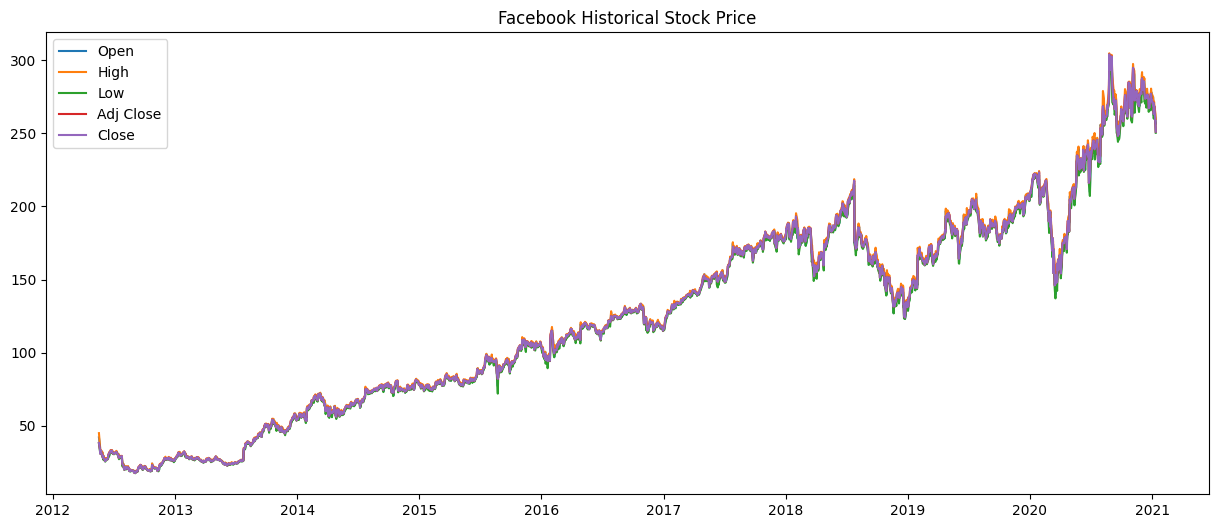

In [308]:
#facebook_price['Open'].plot(title='Facebook Historical Stock Price')
plt.title('Facebook Historical Stock Price')
plt.plot(facebook_price['Open'], label='Open')
plt.plot(facebook_price['High'], label='High')
plt.plot(facebook_price['Low'], label='Low')
plt.plot(facebook_price['Adj Close'], label='Adj Close')
plt.plot(facebook_price['Close'], label='Close')
plt.legend(loc='best')
plt.show()

In [309]:
facebook_price.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400
2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200


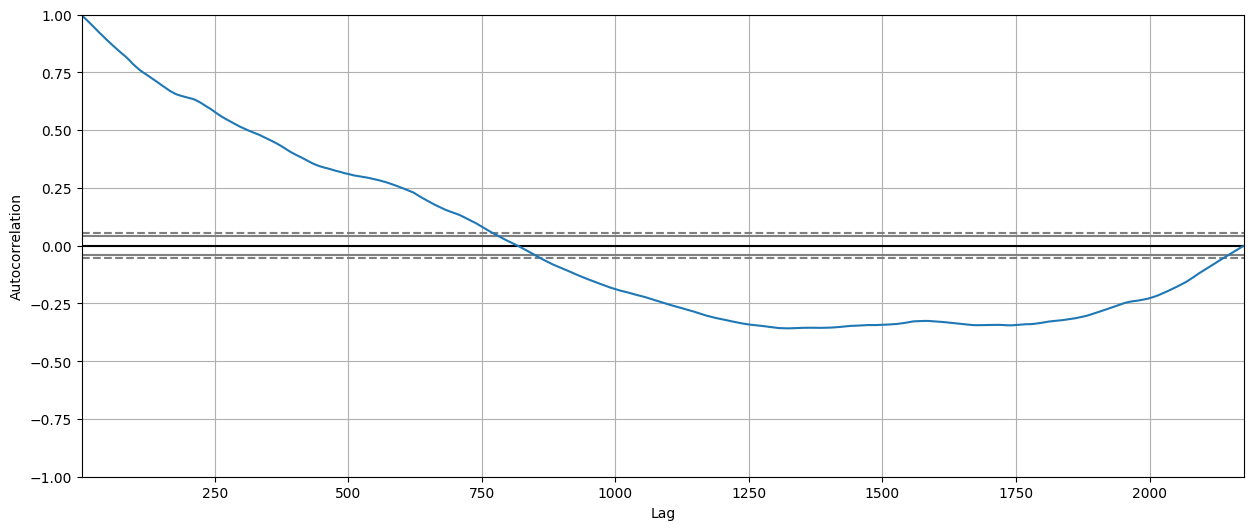

In [310]:
autocorrelation_plot(facebook_price['Close'])
plt.show()